In [115]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import scipy.stats

پروژه صفر: آشنایی با هوش مصنوعی
هدف از این پروژه پرکردن نواقص یک دیتاست با پیشبینی آنها به کمک تحلیل آماری است

جدولی از ویژگی ها داده شده است که باتوجه به هر ویژگی برای بعضی از سطرها مشخص شده است که کاربر روی تبلیغ کلیک کرده است یا خیر. برای بعضی از سطرها مشخص نشده است که باید با توجه به سطرهای پر شده مقدار سطرهای خالی را تخمین زد

In [116]:
#1
df = pd.read_csv('advertising_dataset.csv')
df #'df' is dataFrame. It contains all of the informations

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,2016-03-27 00:53:11,0.0
1,1,80.23,31.0,68441.85,NaN,Monitored national standardization,West Jodi,Male,Nauru,2016-04-04 01:39:02,0.0
2,2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,2016-03-13 20:35:42,0.0
3,3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,2016-01-10 02:31:19,0.0
4,4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,2016-06-03 03:36:18,0.0
...,...,...,...,...,...,...,...,...,...,...,...
995,995,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,Male,Lebanon,2016-02-11 21:49:00,1.0
996,996,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,Male,Bosnia and Herzegovina,2016-04-22 02:07:01,1.0
997,997,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,Male,Mongolia,2016-02-01 17:24:57,1.0
998,998,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,Female,Guatemala,2016-03-24 02:35:54,0.0


In [117]:
df.tail(n=5) #return the last n-rows

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
995,995,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,Male,Lebanon,2016-02-11 21:49:00,1.0
996,996,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,Male,Bosnia and Herzegovina,2016-04-22 02:07:01,1.0
997,997,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,Male,Mongolia,2016-02-01 17:24:57,1.0
998,998,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,Female,Guatemala,2016-03-24 02:35:54,0.0
999,999,NaN,26.0,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,Female,Brazil,2016-06-03 21:43:21,1.0


In [118]:
df.head(n=5) #return the first n-rows

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,2016-03-27 00:53:11,0.0
1,1,80.23,31.0,68441.85,NaN,Monitored national standardization,West Jodi,Male,Nauru,2016-04-04 01:39:02,0.0
2,2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,2016-03-13 20:35:42,0.0
3,3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,2016-01-10 02:31:19,0.0
4,4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,2016-06-03 03:36:18,0.0


In [119]:
df.describe(include='all') #describe specifications of columns
#count = Number of non-NaNs
#unique = Number of unique objects
#top = The object with the highest frequency
#freq = The frequency of the top
#mean = Mean of columns
#std = Std of columns
#min = minimum of columns
#25% = 25% of maximum
#50% = 50% of maximum
#75% = 75% of maximum
#max = maximum of maximum

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
count,1000.000000,907.000000,979.000000,1000.000000,913.000000,1000,1000,1000,1000,1000,832.000000
unique,NaN,NaN,NaN,NaN,NaN,1000,969,2,237,1000,NaN
top,NaN,NaN,NaN,NaN,NaN,Profound executive flexibility,Williamsport,Female,France,2016-02-29 11:00:06,NaN
freq,NaN,NaN,NaN,NaN,NaN,1,3,519,9,1,NaN
mean,499.500000,64.794818,36.009193,55000.000080,179.751271,NaN,NaN,NaN,NaN,NaN,0.496394
std,288.819436,15.954841,8.783636,13414.634022,43.957934,NaN,NaN,NaN,NaN,NaN,0.500288
min,0.000000,32.600000,19.000000,13996.500000,104.780000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,249.750000,50.615000,29.000000,47031.802500,138.550000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,499.500000,67.940000,35.000000,57012.300000,183.480000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,749.250000,78.555000,42.000000,65470.635000,217.850000,NaN,NaN,NaN,NaN,NaN,1.000000


In [120]:
#2
print(df.info())
#'info' method show the information of each column such as name of column, number of non-NaN elements, Dtype of column, number of each Dtype and memory usage
df.replace({'Gender': {'Female': 0, 'Male': 1}}, inplace=True)
df
#Label Encoding
#Replace the Female with 0 and Male with 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  907 non-null    float64
 2   Age                       979 non-null    float64
 3   Area Income               1000 non-null   float64
 4   Daily Internet Usage      913 non-null    float64
 5   Ad Topic Line             1000 non-null   object 
 6   City                      1000 non-null   object 
 7   Gender                    1000 non-null   object 
 8   Country                   1000 non-null   object 
 9   Timestamp                 1000 non-null   object 
 10  Clicked on Ad             832 non-null    float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB
None


,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0.0
1,1,80.23,31.0,68441.85,NaN,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0.0
2,2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0.0
3,3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0.0
4,4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0.0
...,...,...,...,...,...,...,...,...,...,...,...
995,995,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1.0
996,996,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1.0
997,997,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1.0
998,998,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0.0


In [121]:
#3
print(df.isna().sum()) #print number of NaN for each column
for col in df.select_dtypes(include = ['int64', 'float64']).columns:
#select_dtypes method returns the columns with specific types
    if(col != 'Clicked on Ad'):
        df[col].fillna(df[col].mean(), inplace=True) #fill the NaN elements with mean of the column
print(df.isna().sum()) #to prove that nan members were filled
df #printing the DataFrame

Unnamed: 0                    0
Daily Time Spent on Site     93
Age                          21
Area Income                   0
Daily Internet Usage         87
Ad Topic Line                 0
City                          0
Gender                        0
Country                       0
Timestamp                     0
Clicked on Ad               168
dtype: int64
Unnamed: 0                    0
Daily Time Spent on Site      0
Age                           0
Area Income                   0
Daily Internet Usage          0
Ad Topic Line                 0
City                          0
Gender                        0
Country                       0
Timestamp                     0
Clicked on Ad               168
dtype: int64


,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,0,68.950000,35.0,61833.90,256.090000,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0.0
1,1,80.230000,31.0,68441.85,179.751271,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0.0
2,2,69.470000,26.0,59785.94,236.500000,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0.0
3,3,74.150000,29.0,54806.18,245.890000,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0.0
4,4,68.370000,35.0,73889.99,225.580000,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0.0
...,...,...,...,...,...,...,...,...,...,...,...
995,995,72.970000,30.0,71384.57,208.580000,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1.0
996,996,51.300000,45.0,67782.17,134.420000,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1.0
997,997,51.630000,51.0,42415.72,120.370000,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1.0
998,998,55.550000,19.0,41920.79,187.950000,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0.0


In [123]:
#4
print('Male: ', (df['Gender'] == 1).sum()) #number of Male
print('Female: ', (df['Gender'] == 0).sum()) #number of Female
print('Clicked on Ad: ', (df['Clicked on Ad'] == 1.0).sum()) #number of members who clicked on Ad
print('Didn\'t click on Ad: ', (df['Clicked on Ad'] == 0.0).sum()) #number of members who didn't click on Ad

Male:  481
Female:  519
Clicked on Ad:  413
Didn't click on Ad:  419


In [124]:
#5
print('Number of members who are Male and have atleast 21 years: ', ((df['Gender'] == 1) & (df['Age'] > 20)).sum())

Number of members who are Male and have atleast 21 years:  472


In [125]:
#6
#Vectorization solution
ticVec = time.time()
print(df.groupby('Clicked on Ad')['Age'].mean())
#Show the mean of 'Age' column according to the 'Clicked on Ad' column
tocVec = time.time()
durVec = (tocVec - ticVec) * 1000
#Calculate the time of vectorization

Clicked on Ad
0.0    31.723326
1.0    40.295600
Name: Age, dtype: float64


In [129]:
#7
#For loop solution
ticFor = time.time()
size = df.shape[0]

clicked = 0.0
notClicked = 0.0
numClicked = 0
numNotClicked = 0

#Doing for loop in each elements of 'Age' column
for i in range(size):
    if(df['Clicked on Ad'][i] == 1.0):
        clicked += df['Age'][i]
        numClicked += 1
    elif(df['Clicked on Ad'][i] == 0.0):
        notClicked += df['Age'][i]
        numNotClicked += 1
meanClicked = clicked / numClicked
meanNotClicked = notClicked / numNotClicked
#Calculate the mean of 'Age' column according to the 'Clicked on Ad' column
print('Mean of not clicked: ', meanNotClicked)
print('Mean of clicked: ', meanClicked)
tocFor = time.time()
durFor = (tocFor - ticFor) * 1000
#Calculate the time of for loop
print('Vectorization: %f ms' %(durVec))
print('For loop %f ms' %(durFor))
#Vectorization is 10 times faster

Mean of not clicked:  31.723325881701896
Mean of clicked:  40.295599848637366
Vectorization: 4.218102 ms
For loop 43.950796 ms


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Daily Time Spent on Site'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Area Income'}>,
        <AxesSubplot:title={'center':'Daily Internet Usage'}>,
        <AxesSubplot:title={'center':'Gender'}>],
       [<AxesSubplot:title={'center':'Clicked on Ad'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

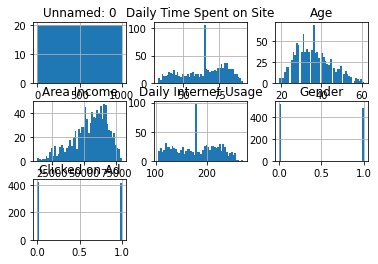

In [130]:
#8
df.hist(bins = 50)

تابع بالا نمودار توزیع هر ستون را نمایش می دهد و ورودی

bins = 50

باعث می شود که در نمودار ۵۰ ستون وجود داشته باشد
این نمودار نشان می دهد که فراوانی هر عضو هر ستون در مقایسه با بقیه اعضای آن ستون چقدر است
برای مثال جنسیت خانم ها بیشتر از جنسیت مردهاست

In [131]:
#9
dfNumbers = df.select_dtypes(include = ['float64']).copy(deep=True)
for col in dfNumbers.columns:
    if(col != 'Clicked on Ad'):
        dfNumbers[col] = (dfNumbers[col] - dfNumbers[col].mean()) / dfNumbers[col].std()
#The operation of normalization for each column except 'Clicked on Ad' to improve the information
dfNumbers #printing the dataFrame

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,0.273474,-0.116122,0.509436,1.817578,0.0
1,1.015870,-0.576377,1.002029,0.000000,0.0
2,0.307698,-1.151696,0.356770,1.351152,0.0
3,0.615713,-0.806505,-0.014448,1.574722,0.0
4,0.235301,-0.116122,1.408163,1.091154,0.0
...,...,...,...,...,...
995,0.538051,-0.691441,1.221395,0.686394,1.0
996,-0.888164,1.034517,0.952853,-1.079309,1.0
997,-0.866445,1.724900,-0.938101,-1.413831,1.0
998,-0.608450,-1.957144,-0.974996,0.195207,0.0


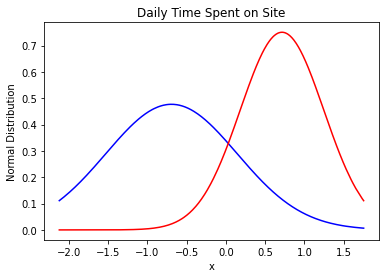

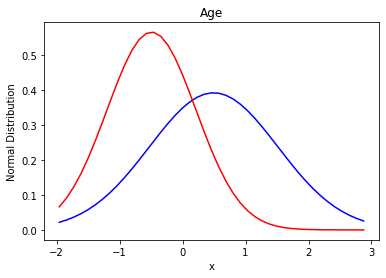

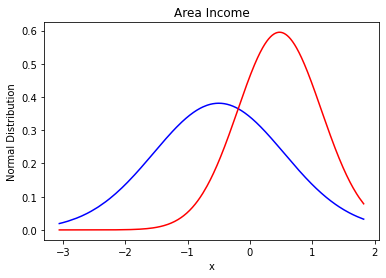

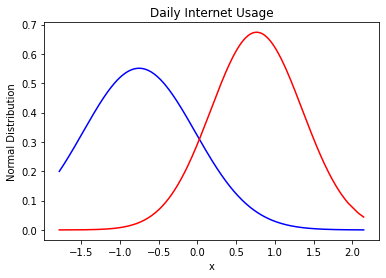

<Figure size 432x288 with 0 Axes>

In [132]:
#10
means = dfNumbers.groupby('Clicked on Ad').mean()
#Calculate the mean of each column according to 'Clicked on Ad' column
stds = dfNumbers.groupby('Clicked on Ad').std()
#Calculate the STD(Standard Deviation) of each column according to 'Clicked on Ad' column
x = {}
yClicked = {}
yNotClicked = {}
for col in dfNumbers.columns:
    if(col != 'Clicked on Ad'):
        x[col] = dfNumbers[col].sort_values(ascending=True)
        #Sorting the elements of 'col' column
        yClicked[col] = scipy.stats.norm.pdf(x[col], means[col][1], stds[col][1])
        #Calculate the pdf of elements of 'col' column for who clicked on ad
        yNotClicked[col] = scipy.stats.norm.pdf(x[col], means[col][0], stds[col][0])        
        #Calculate the pdf of elements of 'col' column for who didn't click on ad
        plt.plot(x[col], yClicked[col], color = 'blue')
        plt.plot(x[col], yNotClicked[col], color = 'red')
        plt.xlabel('x')
        plt.ylabel('Normal Distribution')
        plt.title(col)
        plt.show()
        plt.figure()

نمودار آبی برای کلیک شده ها و نمودار قرمز برای کلیک نشده هاست
هرچه انحراف معیار کلیک شده ها کمتر باشد آن ویژگی بهتری است زیرا بازه ای که دیتاها درآن قرار دارند کوچکتر است بنابراین دیتاهایی که نزدیک به میانگین هستند به احتمال بهتری می توان آنها را تخمین زد

هرچه فاصله میانگین های دو نمودار بیشتر باشد آن ویژگی بهتری است زیرا برخورد نمودار ها در قسمت های پایینی نمودارها صورت می گیرد و لذا تصمیم گیری آسان تر می شود

نمودارهای کلیک نشده بالا تیزی یکسانی دارند(یعنی انحراف معیار تقریبا یکسانی دارند) بنابراین باتوجه به آن نمی توان تصمیم گیری کرد که کدام ویژگی بهتر است
از بین نمودارهای کلیک شده نمودار 'استفاده روزانه از اینترنت' تیزتر است(یعنی انحراف معیار کمتری دارد) و همینطور فاصله میانگین دو نمودار برای این ویژگی از بقیه نمودارها بیشتر است

بنابراین بهترین ویژگی 'استفاده روزانه از اینترنت' است. ولی راهکار بهتر این است که یک ترکیبی از ویژگی ها باشد و فقط از یک ویژگی برای تخمین استفاده نشود

In [133]:
#11
attribute = 'Daily Internet Usage'
conditions = scipy.stats.norm.pdf(dfNumbers[attribute], means[attribute][1], stds[attribute][1]) > scipy.stats.norm.pdf(dfNumbers[attribute], means[attribute][0], stds[attribute][0])
#check the condition for each row
dfOut = dfNumbers[dfNumbers['Clicked on Ad'].isnull()].copy(deep=True)
conditions = conditions[dfNumbers['Clicked on Ad'].isnull()]

dfOut[conditions] = dfOut.fillna(1.0)
#fill NaN with 1.0 for elements that have True condition
dfOut = dfOut.fillna(0.0)
#fill NaN with 0.0 for rest of NaN elements(that have False condition)
dfOut.to_csv('Predictions.csv', columns = ['Clicked on Ad'])
#csv file has index column and 'Clicked on Ad' column
dfOut

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
10,-1.129048,1.494773,-0.698304,-1.374546,1.0
14,-1.437721,-0.346249,-1.790880,-0.861692,1.0
15,-0.088509,-1.496888,-0.210052,-0.931215,1.0
20,0.817766,-0.691441,0.730719,1.064011,0.0
24,-1.540393,0.574262,1.040827,-0.298362,1.0
...,...,...,...,...,...
963,-0.266210,0.689325,1.101465,1.602341,0.0
966,-1.791149,1.839964,-0.253420,-0.072649,1.0
967,0.211608,-1.266760,0.995775,0.204016,0.0
977,-0.646622,-0.576377,-0.231089,-1.508831,1.0


برای تخمین باید مقدار تابع چگالی احتمال را برای هر عضو ستون استفاده روزانه از اینترنت برای دو حالت کلیک شده و کلیک نشده بدست آورد و نمودار هرکدام که بالاتر بود در آن نقطه(یعنی مقدار چگالی احتمال بیشتری داشت) نشان دهنده کلیک شدن یا نشدن روی آن تبلیغ است زیرا به میانگین آن نمودار نزدیک تر است و بنابراین احتمال اینکه این داده متعلق به آن نمودار باشد بیشتر است